<a href="https://colab.research.google.com/github/rishuptdr/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Team_colab_of_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

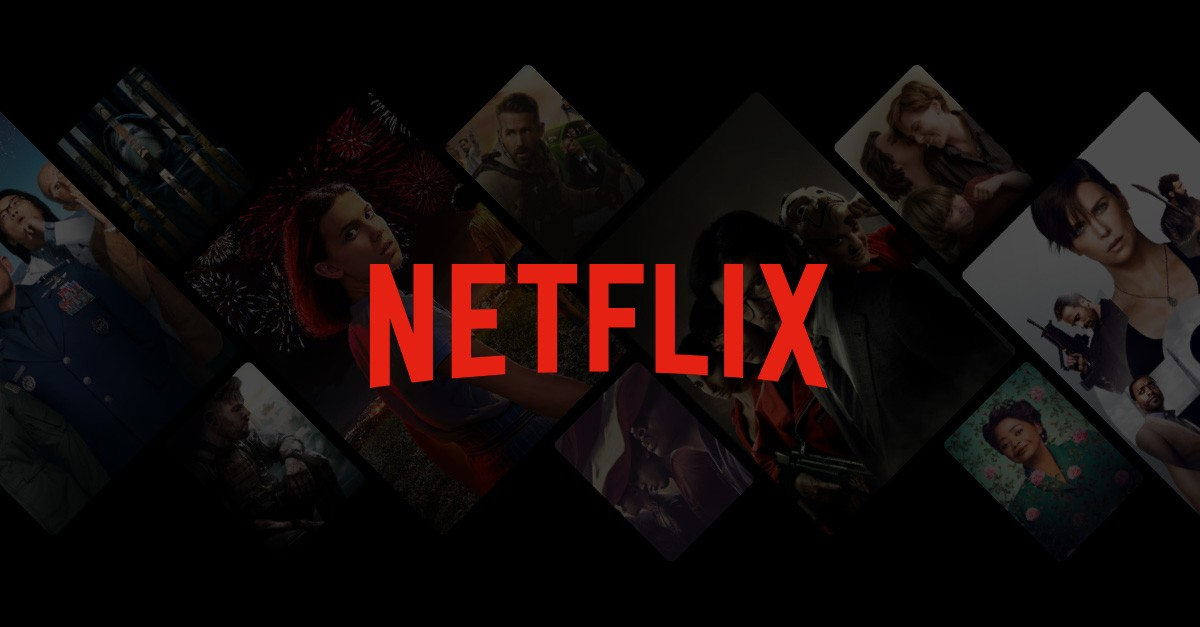

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import pylab as pl
import spacy
import sklearn
import en_core_web_sm

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
netflix = pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
df = netflix.copy()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# **Data processing**

In [ ]:
#Drop duplicates 
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


There are no duplicated values

In [ ]:
#Checking Null Values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#total null values
df.isnull().sum().sum()

3631

There are 3631 null values in the dataset, 2389 null values in director column, 718 null values in cast column ,507 null values in country column ,10 in date_added and 7 in rating. so we need to handle the null values

In [ ]:
#Handling Null Values
df['cast'].fillna(value='No cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [ ]:
#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
#Dropping Director Column
df.drop(['director'],axis=1,inplace=True)

In [ ]:
#again checking is there any null values are not
df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# **EDA**

## According to type:

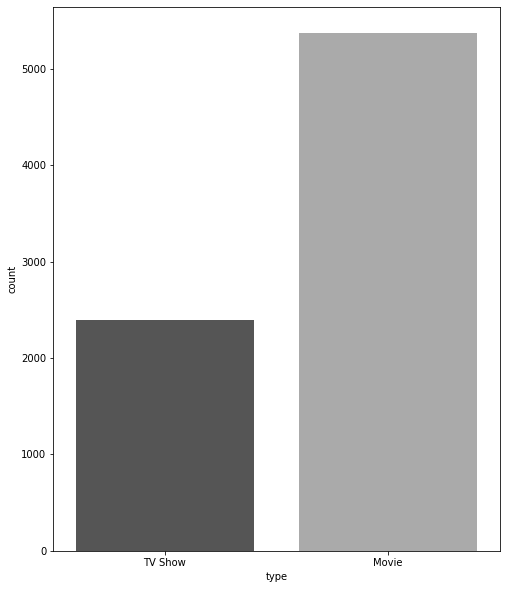

In [ ]:
plt.figure(figsize=(8, 10))    
sns.countplot(x='type', data=df , palette='gray')

plt.show()

In [ ]:
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

It shows that TV show are less as compared to movie.

## According to Rating:

In [ ]:
df['rating']

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7770, dtype: object

In [ ]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)

In [ ]:
# type should be a catego
df['type'] = pd.Categorical(df['type'])
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [ ]:
df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,Older Kids


In [ ]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

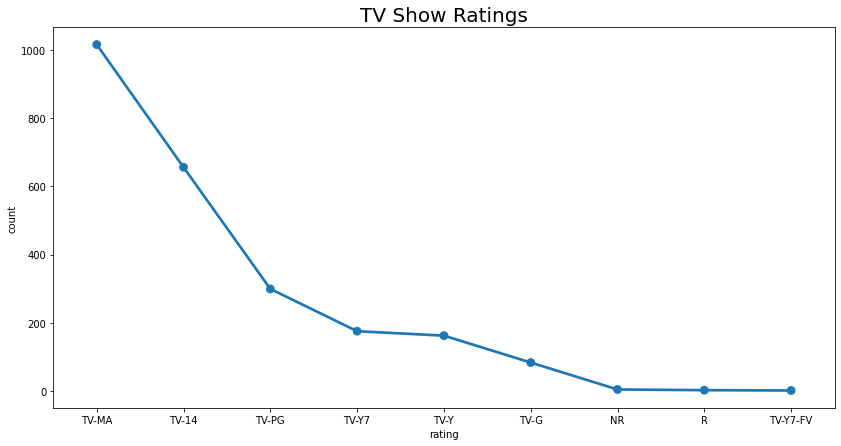

In [ ]:
#Rating based on rating system of all TV Shows
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()


TV-MA has the highest number of ratings for tv shows i,e adult ratings

In [ ]:
df_shows = df[df["type"]=="TV Show"]
df_movies = df[df["type"]=="Movie"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


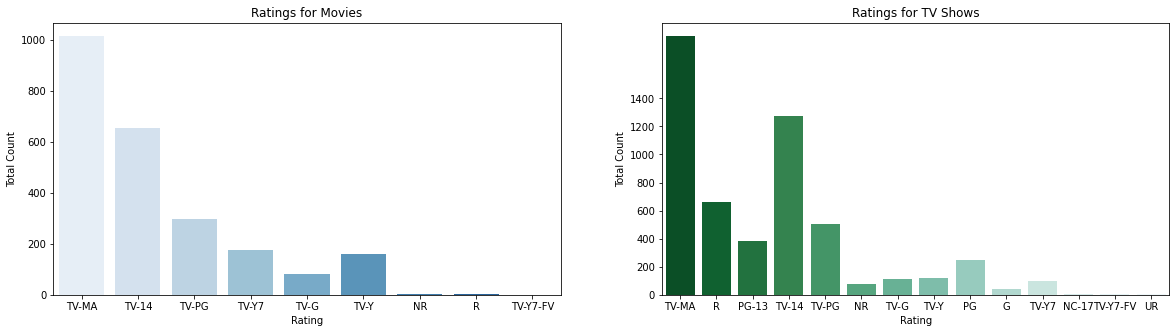

In [ ]:
#for TV show and movies individually
fig, ax = plt.subplots(1,2, figsize=(20, 5))
g1 = sns.countplot(df_shows.rating,palette="Blues", ax=ax[0]);
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")
g2 = sns.countplot(df_movies.rating,palette="BuGn_r", ax=ax[1]);
g2.set(yticks=np.arange(0,1600,200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")
fig.show()

## Realease years:

In [ ]:
movies_year =movies['release_year'].value_counts().sort_index(ascending=False)

In [ ]:
movies_year

2021     12
2020    411
2019    582
2018    734
2017    742
       ... 
1946      1
1945      3
1944      3
1943      3
1942      2
Name: release_year, Length: 72, dtype: int64

In [ ]:
tvshows_year =tv_shows['release_year'].value_counts().sort_index(ascending=False)

In [ ]:
tvshows_year

2021     19
2020    457
2019    414
2018    386
2017    268
2016    239
2015    156
2014     90
2013     63
2012     60
2011     39
2010     36
2009     34
2008     22
2007     13
2006     13
2005     12
2004      9
2003      7
2002      6
2001      4
2000      4
1999      7
1998      4
1997      4
1996      3
1995      2
1994      1
1993      4
1992      2
1991      1
1990      3
1989      1
1988      2
1986      2
1985      1
1981      1
1979      1
1977      1
1974      1
1972      1
1968      1
1967      1
1963      1
1946      1
1925      1
Name: release_year, dtype: int64

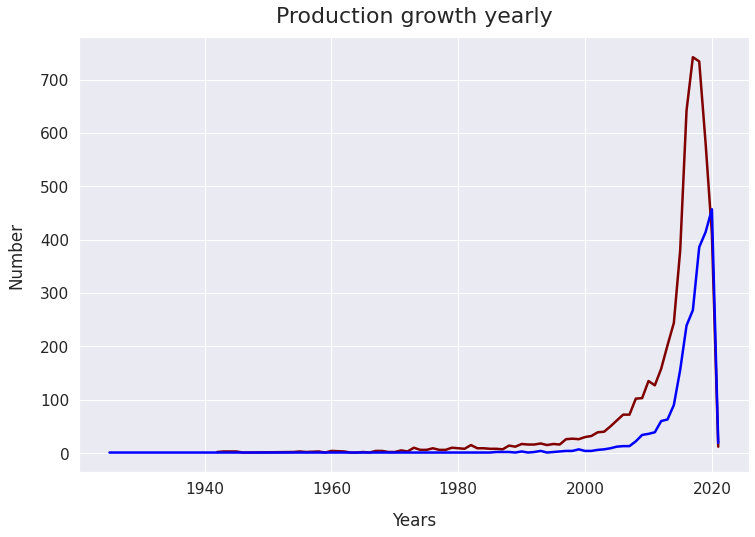

In [ ]:
# visualizing the movies and tv_shows based on the release year
sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
tvshows_year.plot(figsize=(12, 8), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22);

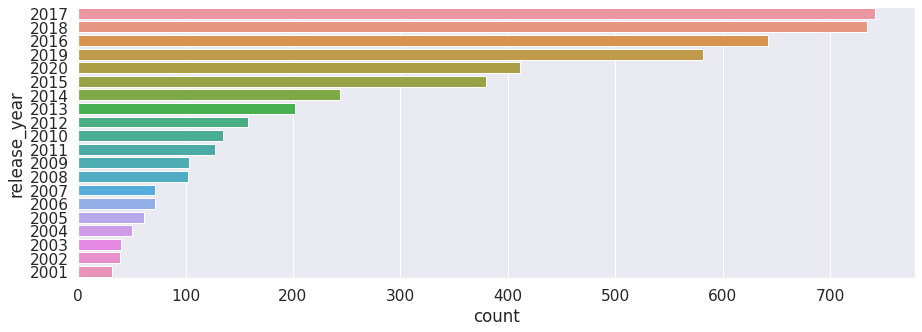

In [ ]:
#Analysing how many movies released per year in last 20 years
plt.figure(figsize=(15,5))
sns.countplot(y=movies['release_year'],data=df,order=movies['release_year'].value_counts().index[0:20])

highest number of movies released in 2017 and 2018

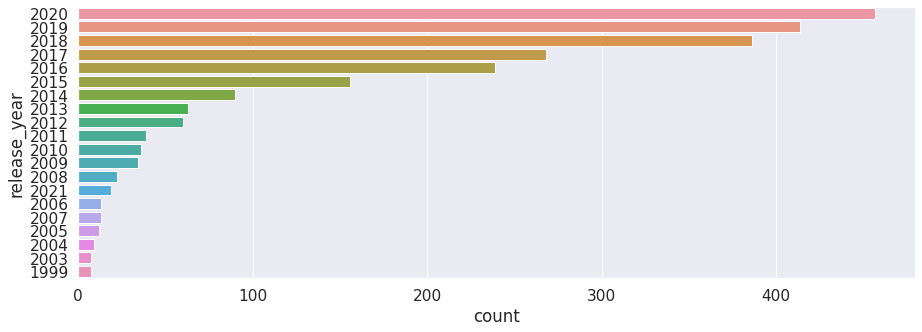

In [ ]:
#Analysing how many movies released per year in last 15 years
plt.figure(figsize=(15,5))
sns.countplot(y=tv_shows['release_year'],data=df,order=tv_shows['release_year'].value_counts().index[0:20])



*   Highest number of movies released in 2020.
*   The number of movies on Netflix is growing significantly faster than the number of TV shows.
*   We saw a huge increase in the number of movies and television episodes after 2015.
*   There is a significant drop in the number of movies and television episodes produced after 2020.
*   
It appears that Netflix has focused more attention on increasing Movie content that TV Shows. Movies have increased much more dramatically than TV shows.







### Month wise Analysis:

**Creating a new feature month to analyse data on monthly basis**

In [ ]:
#adding columns of month and year of addition

df['month'] = pd.DatetimeIndex(df['date_added']).month
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


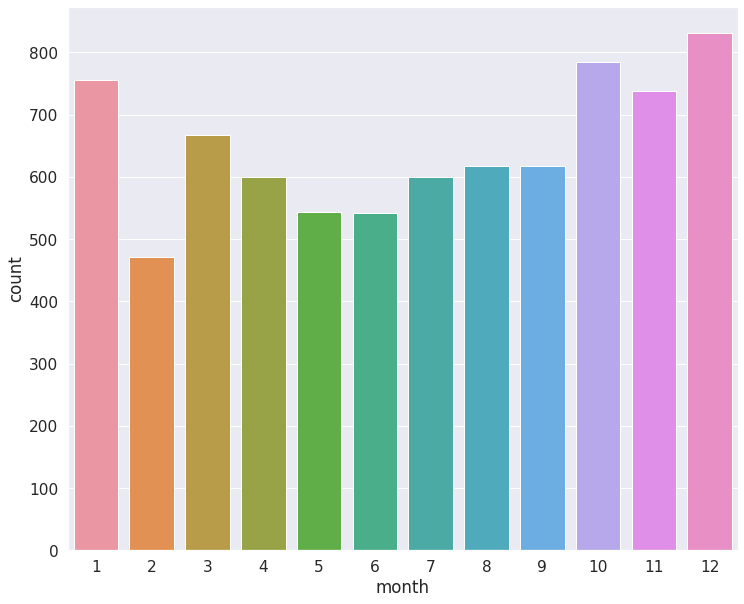

In [ ]:
# Plotting the Countplot 
plt.figure(figsize=(12,10))
ax=sns.countplot('month',data= df)

From October to January, maximum number of movies and TV shows were added.

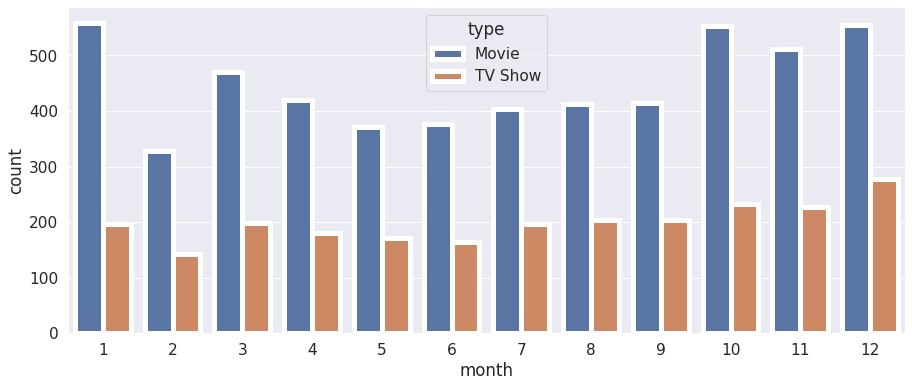

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(x='month', hue='type',lw=5, data=df, ax=ax)

In [ ]:
df["month"]=df['date_added'].str.split(' ').str[0]
df_month = df.groupby(["month"])['show_id'].count().reset_index(name = 'count')
df_month=df_month.drop([0])
df_month

,month,count
1,April,595
2,August,611
3,December,816
4,February,465
5,January,745
6,July,592
7,June,538
8,March,660
9,May,537
10,November,730


In [ ]:
sort_dict = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_month['month']=pd.Categorical(df_month['month'],categories=sort_dict)

df_month.sort_values(by='month',inplace=True)
df_month

,month,count
5,January,745
4,February,465
8,March,660
1,April,595
9,May,537
7,June,538
6,July,592
2,August,611
12,September,613
11,October,780


# Genre:

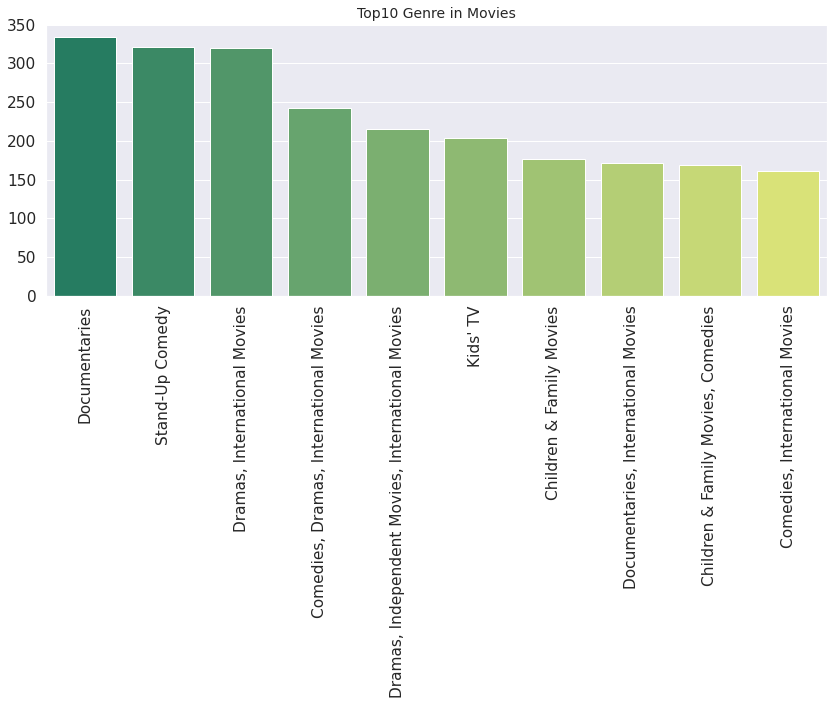

In [ ]:
# Top 10 Genre in movies
plt.figure(figsize=(14,5))
sns.barplot(x = df["listed_in"].value_counts().head(10).index,
            y = df["listed_in"].value_counts().head(10).values,palette="summer")
plt.xticks(rotation=90)
plt.title("Top10 Genre in Movies",fontsize = 14)
plt.show()

**Documentaries are highest** in numbers followed by **standup comedy** then **Dramas**

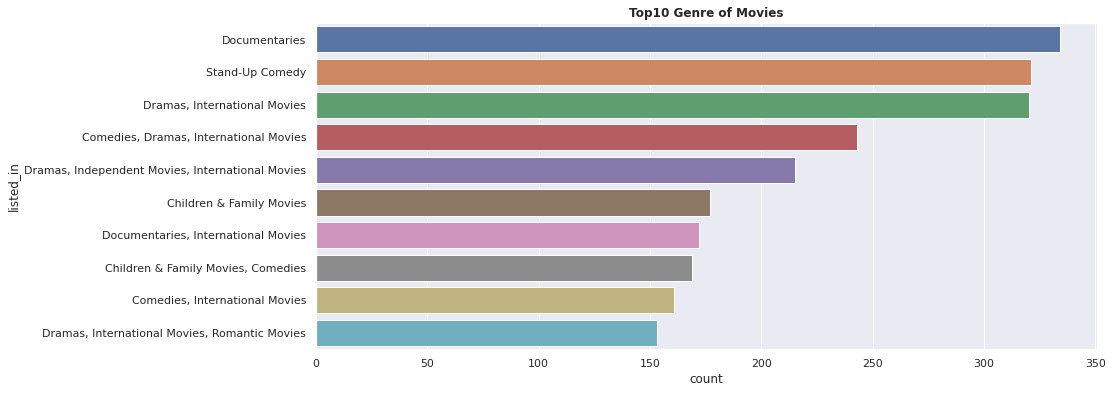

In [ ]:
#Analysing top10 genre of the movies
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10])

## Country Analysis:

In [ ]:
df['country'].value_counts()

United States                                                   3051
India                                                            923
United Kingdom                                                   396
Japan                                                            224
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

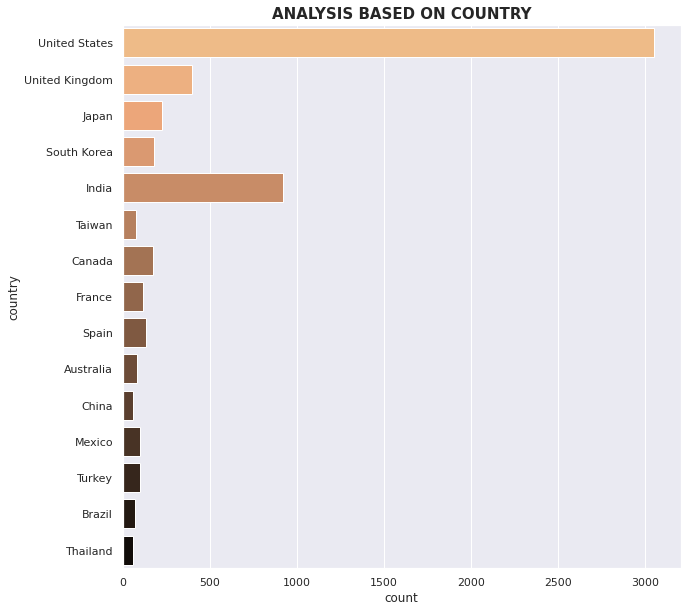

In [ ]:
#plotting release year of TV show
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="country", data=df, palette="copper_r", order=df_shows['country'].value_counts().index[0:15])

plt.title('ANALYSIS BASED ON COUNTRY', fontsize=15, fontweight='bold')
plt.show()

USA having maximum numbers of TVshows followed by India.

In [ ]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.180791,0.000000,0.095652,0.016251,0.008929,0.02,0.027322,0.022388,0.093434,0.089479
Older Kids,0.225989,0.039604,0.060870,0.160347,0.272321,0.07,0.120219,0.044776,0.204545,0.195346
Teens,0.146893,0.683168,0.165217,0.567714,0.352679,0.14,0.382514,0.097015,0.189394,0.243199
Adults,0.446328,0.277228,0.678261,0.255688,0.366071,0.77,0.469945,0.835821,0.512626,0.471976


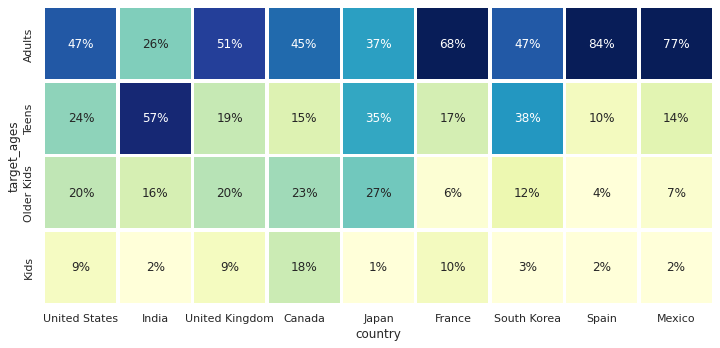

In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

<BarContainer object of 11 artists>

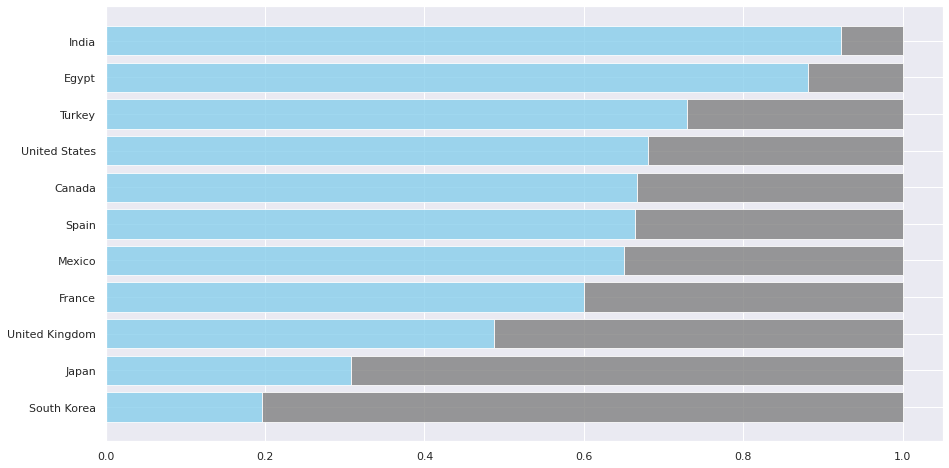

In [ ]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = df['country'].value_counts()[:11].index
content_data = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'], 
        color='skyblue', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'], 
        color='gray', alpha=0.8, label='TV Show')

India is the country having maximum numbers of movie on netflix.

## Duration:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


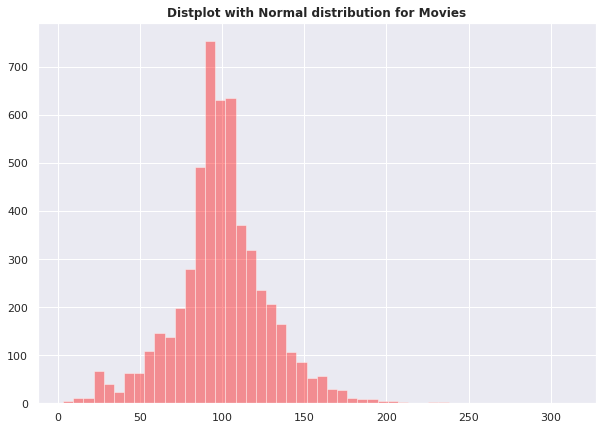

In [ ]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(movies['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

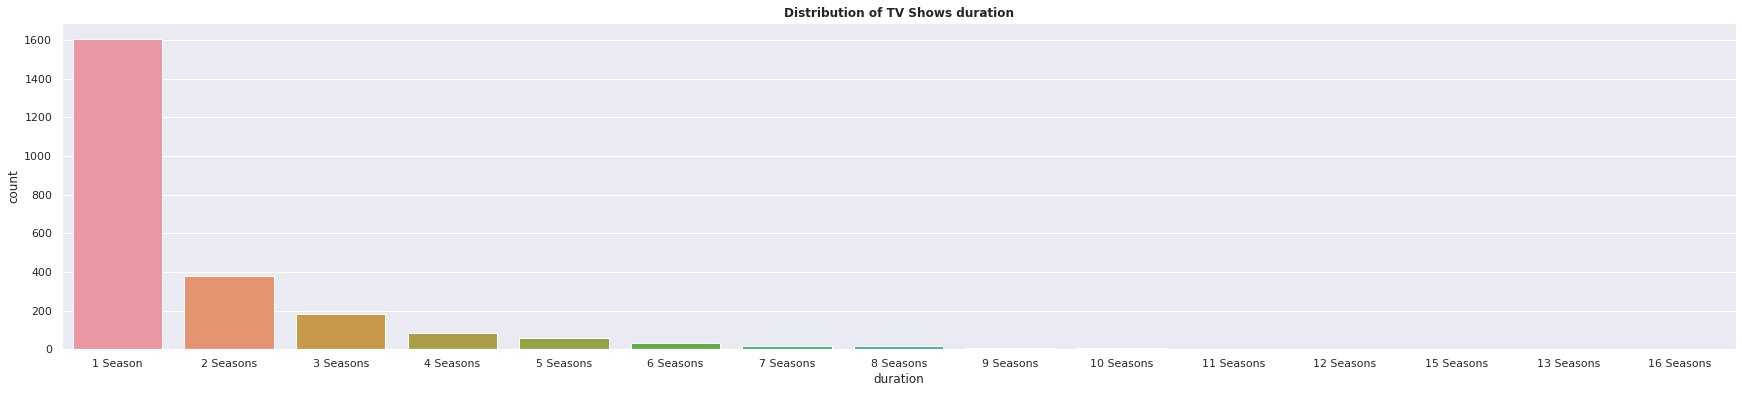

In [ ]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)

Maximum TV shows having single season.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


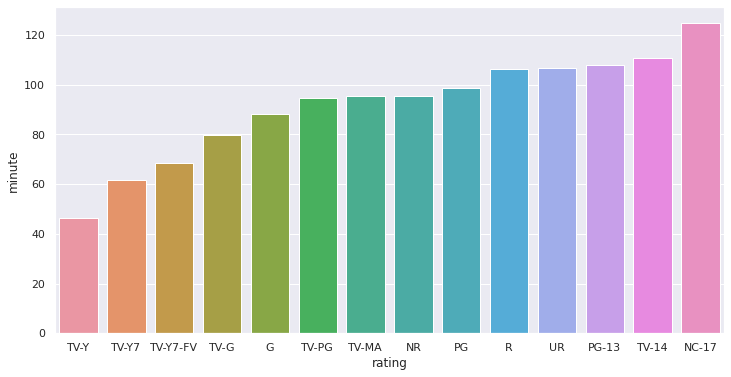

In [ ]:
movies['minute'] = movies['duration'].str.extract('(\d+)').apply(pd.to_numeric)
duration_year = movies.groupby(['rating'])['minute'].mean()
duration_df=pd.DataFrame(duration_year).sort_values('minute')
plt.figure(figsize=(12,6))
ax=sns.barplot(x=duration_df.index, y=duration_df.minute)

Those movies that have a rating of NC-17 have the longest average duration.

When it comes to movies having a TV-Y rating, they have the shortest runtime on average

## WordCloud

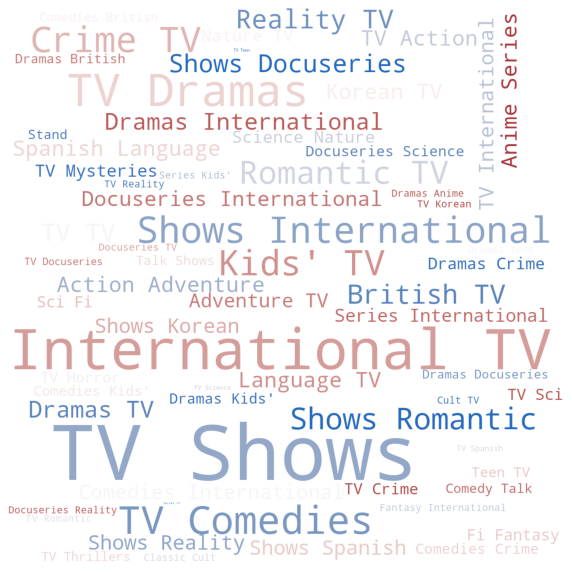

In [ ]:
#wordcloud
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_shows['listed_in'])

plt.rcParams['figure.figsize'] = (10,12)
wordcloud = WordCloud(background_color = 'white',colormap='vlag', width = 1200,  height = 1200, max_words = 130).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

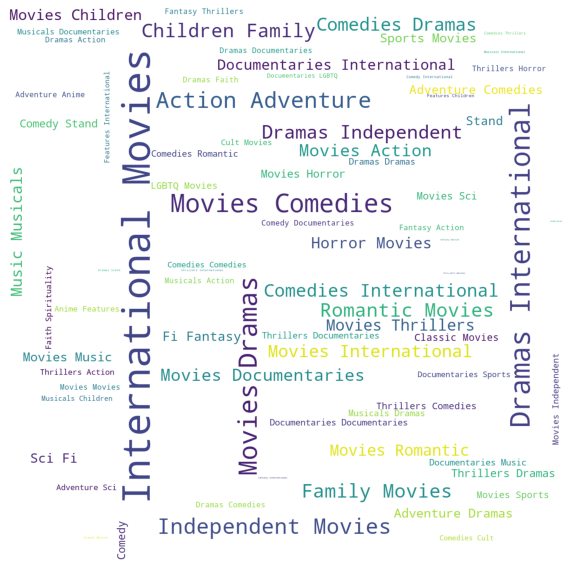

In [ ]:
# the movies
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_movies['listed_in'])

plt.rcParams['figure.figsize'] = (10,12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 130).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Feature Engineering:

In [ ]:
df['description'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [ ]:
df2=df
import nltk
nltk.download('punkt')
#translator = str.maketrans('', '', string.punctuation)
df2['description'] = df2['description'].apply(lambda x:nltk.word_tokenize(x))
print(df2['description'])
df2['description'] =df2['description'].apply(lambda x:[word.lower() for word in x if word.isalpha()])
df2['description'] =df2['description'].apply(lambda x:" ".join(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0       [In, a, future, where, the, elite, inhabit, an...
1       [After, a, devastating, earthquake, hits, Mexi...
2       [When, an, army, recruit, is, found, dead, ,, ...
3       [In, a, postapocalyptic, world, ,, rag-doll, r...
4       [A, brilliant, group, of, students, become, ca...
                              ...                        
7782    [When, Lebanon, 's, Civil, War, deprives, Zozo...
7783    [A, scrappy, but, poor, boy, worms, his, way, ...
7784    [In, this, documentary, ,, South, African, rap...
7785    [Dessert, wizard, Adriano, Zumbo, looks, for, ...
7786    [This, documentary, delves, into, the, mystiqu...
Name: description, Length: 7770, dtype: object


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

def stopwords(text):
    '''a function for removing the stopword'''
  
    text = [word.lower() for word in text.split() if word.lower() not in sw]
   
    return " ".join(text)

In [ ]:
df['length_listed'] = df['listed_in'].apply(len)

In [ ]:
# count vectorizer
count_vectorizer = CountVectorizer()
count_vectorizer.fit(df['description'])
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
#vocab and counts
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values()

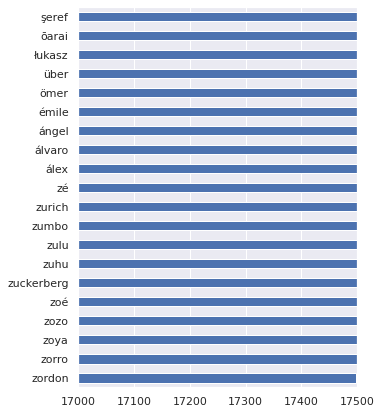

In [ ]:
top_vacab = vocab_bef_stem.tail(20)
top_vacab.plot(kind = 'barh', figsize=(5,7), xlim= (17000, 17500))

In [ ]:
# lists to store the vocab and counts
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)

vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

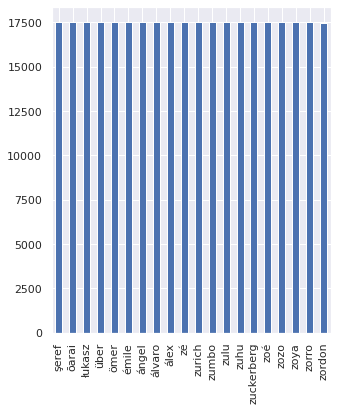

In [ ]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(5,6), xlim= (19550, 19600))

In [ ]:
# object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
#stemming for description
stemmer = SnowballStemmer("english")
df['description'] = df['description'].apply(lambda x:[stemmer.stem(word) for word in x.split()])
df['description'] =df['description'].apply(lambda x:" ".join(x))


In [ ]:
#  vectorizer object
count_vectorizer = CountVectorizer()
count_vectorizer.fit(df['description'])
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
df['length'] = df['description'].apply(len)

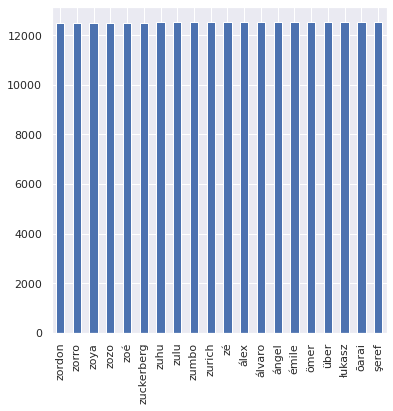

In [ ]:
# lists to store the vocab and counts
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)

vocab_after_stem = pd.Series(count, index=vocab)
vocab_after_stem = vocab_after_stem.sort_values()
top_vacab = vocab_after_stem.tail(20)
top_vacab.plot(kind = 'bar', figsize=(6,6),xlim= (19000,19600))

In [ ]:
df2['description'] = df2['description'].apply(lambda x:nltk.word_tokenize(x))

df2['description'] =df2['description'].apply(lambda x:[word.lower() for word in x if word.isalpha()])
df2['description'] =df2['description'].apply(lambda x:" ".join(x))
print(df2['description'])

0       in a futur where the elit inhabit an island pa...
1       after a devast earthquak hit mexico citi trap ...
2       when an armi recruit is found dead his fellow ...
3       in a postapocalypt world robot hide in fear fr...
4       a brilliant group of student becom expert with...
                              ...                        
7782    when lebanon civil war depriv zozo of his fami...
7783    a scrappi but poor boy worm his way into a tyc...
7784    in this documentari south african rapper nasti...
7785    dessert wizard adriano zumbo look for the next...
7786    this documentari delv into the mystiqu behind ...
Name: description, Length: 7770, dtype: object


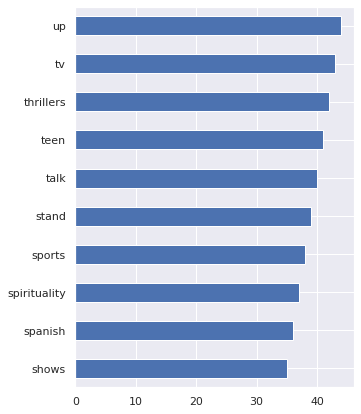

In [ ]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
count_vectorizer.fit(df['listed_in'])
dictionary_l = count_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
for key, value in dictionary_l:
    vocab.append(key)
    count.append(value)
vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values()

top_vacab = vocab_bef_stem.tail(10)
top_vacab.plot(kind = 'barh', figsize=(5,7))

In [ ]:
#stemming for listed_in

stemmer = SnowballStemmer("english")
df['listed_in'] = df['listed_in'].apply(lambda x:[stemmer.stem(word) for word in x.split()])
df['listed_in'] =df['listed_in'].apply(lambda x:" ".join(x))

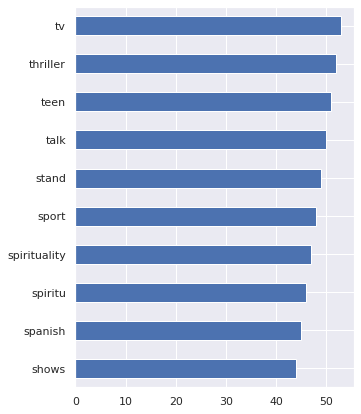

In [ ]:
# object of tfid vectorizer
vectorizer = TfidfVectorizer(stop_words="english")
vectorizer.fit(df['listed_in'])
dictionary_listed_in = vectorizer.vocabulary_.items()

# vocab and counts
vocab = []
count = []
for key, value in dictionary_listed_in:
    vocab.append(key)
    count.append(value)

vocab_after_stem = pd.Series(count, index=vocab)
vocab_after_stem = vocab_after_stem.sort_values()
top_vacab = vocab_after_stem.tail(10)
top_vacab.plot(kind = 'barh', figsize=(5,7))

# **Clustering:**

In [ ]:

X_features_rec_mon=df[['length','length_listed']]
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("n_clusters = {}, silhouette score is {}".format(n_clusters, score))
    

n_clusters = 2, silhouette score is 0.3601761941410064
n_clusters = 3, silhouette score is 0.3786424530063482
n_clusters = 4, silhouette score is 0.34764733391208535
n_clusters = 5, silhouette score is 0.35819475414428864
n_clusters = 6, silhouette score is 0.36830181782871185
n_clusters = 7, silhouette score is 0.36688539987717955
n_clusters = 8, silhouette score is 0.3749093040876926
n_clusters = 9, silhouette score is 0.36078158796231835
n_clusters = 10, silhouette score is 0.3631092224989
n_clusters = 11, silhouette score is 0.34785339696637924
n_clusters = 12, silhouette score is 0.3565079341635906
n_clusters = 13, silhouette score is 0.3534913813887398


n_clusters = 2 average silhouette_score : 0.3601761941410064
n_clusters = 3 average silhouette_score : 0.3786424530063482
n_clusters = 4 average silhouette_score : 0.3490757756268031
n_clusters = 5 average silhouette_score : 0.3601906332511891
n_clusters = 6 average silhouette_score : 0.36897493498221406
n_clusters = 7 average silhouette_score : 0.36838411932126613
n_clusters = 8 average silhouette_score : 0.37620651370154173
n_clusters = 9 average silhouette_score : 0.3653726018523565
n_clusters = 10 average silhouette_score : 0.3620302707779632
n_clusters = 11 average silhouette_score : 0.3508504743351034
n_clusters = 12 average silhouette_score : 0.3564659039290166
n_clusters = 13 average silhouette_score : 0.3459001280564221


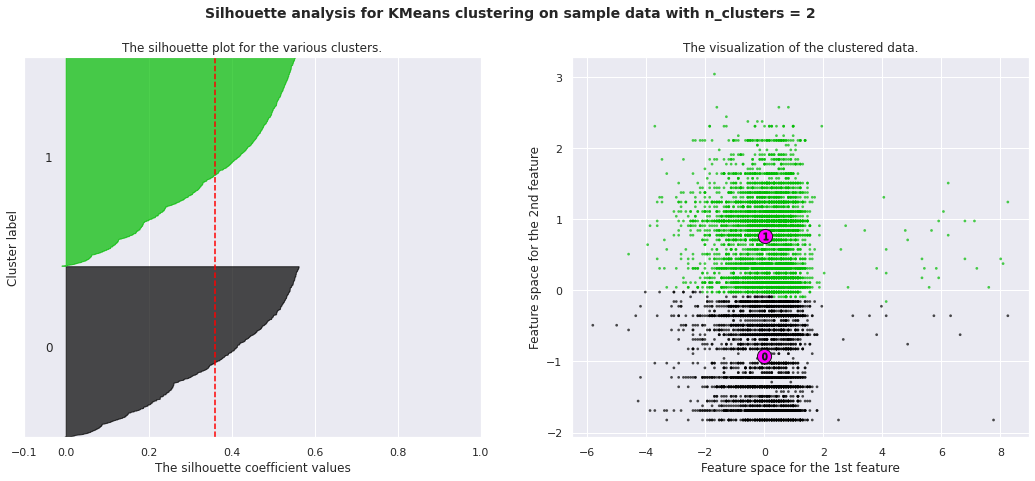

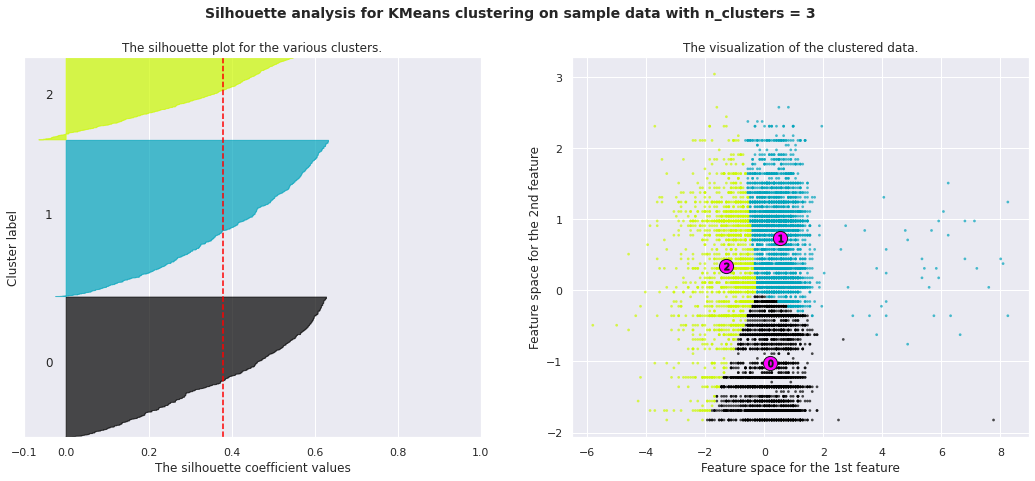

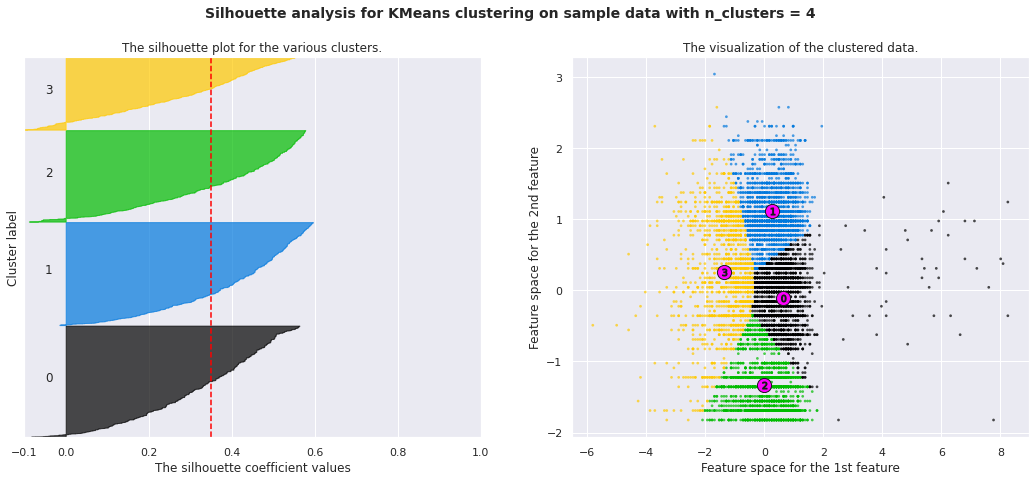

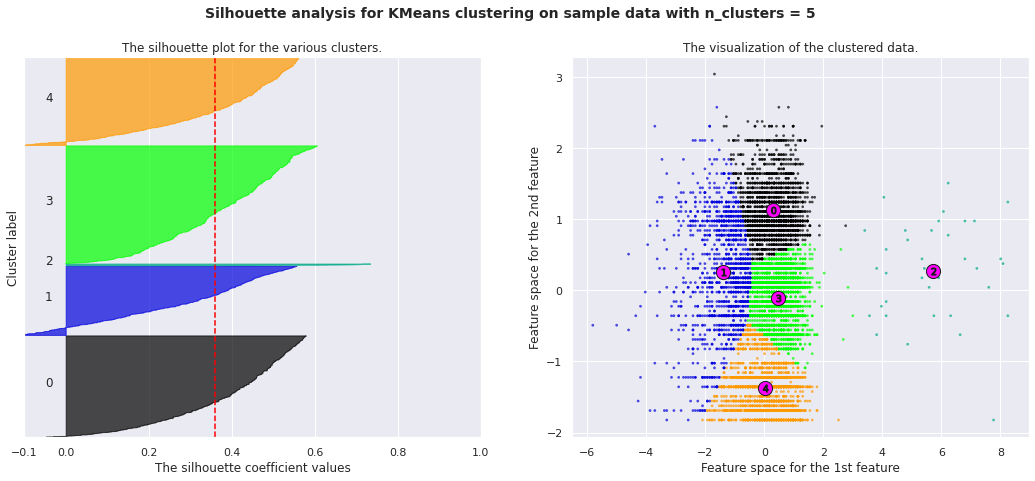

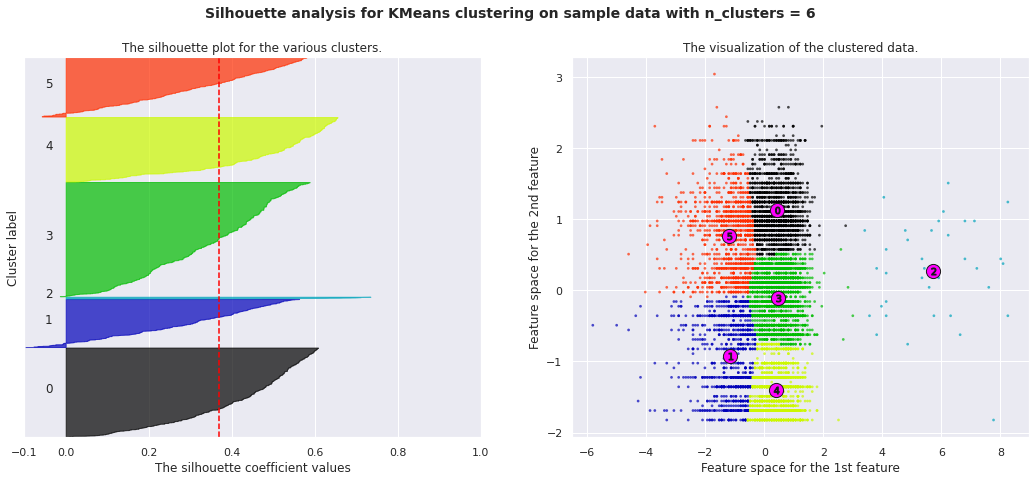

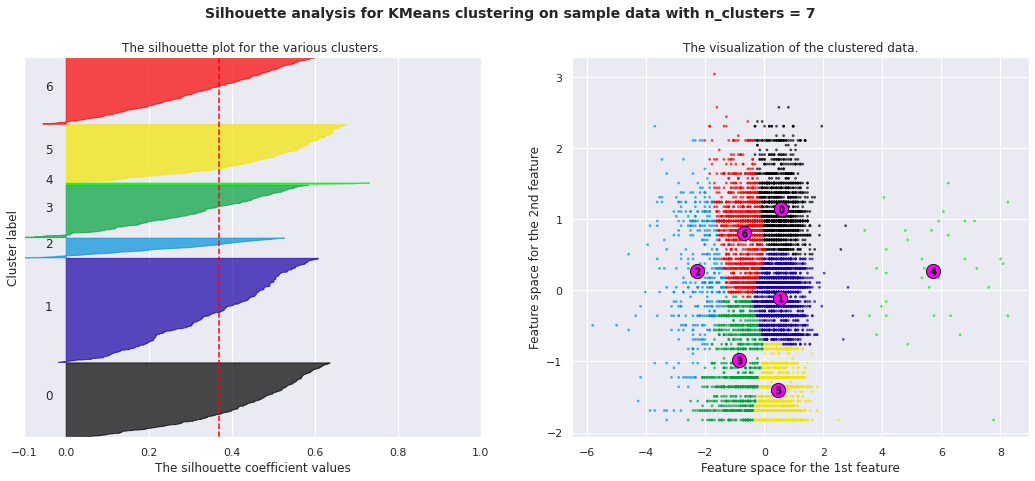

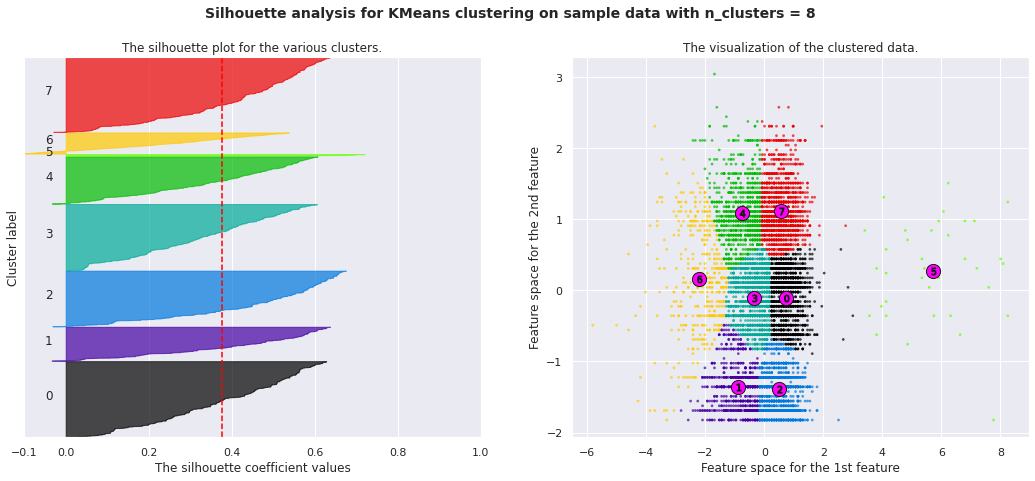

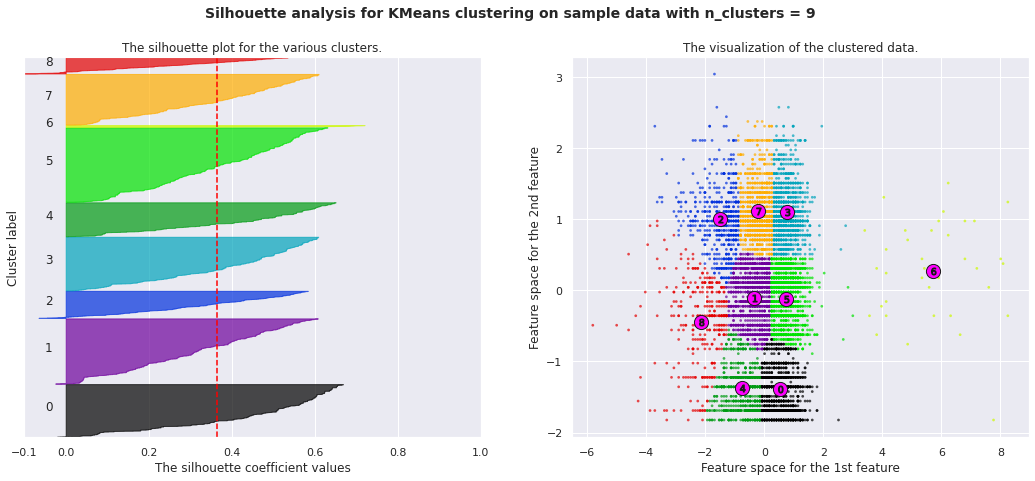

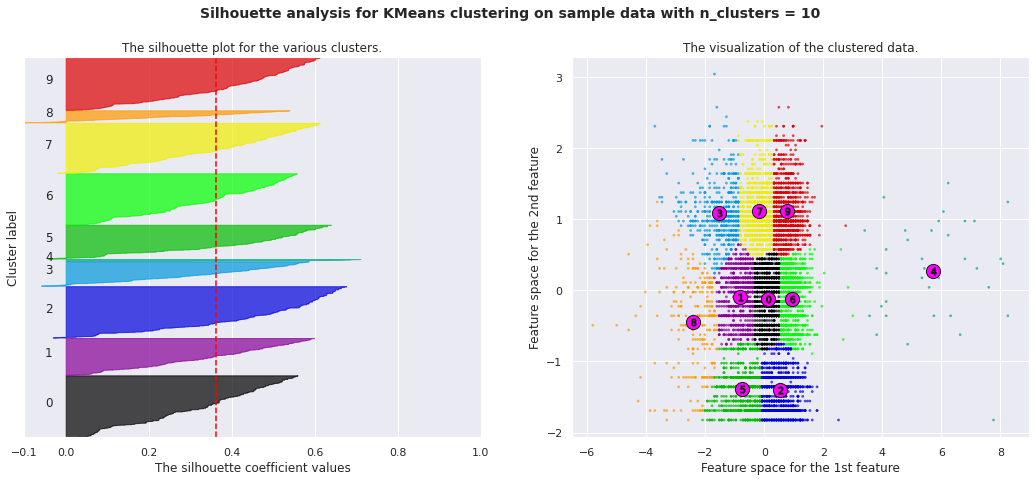

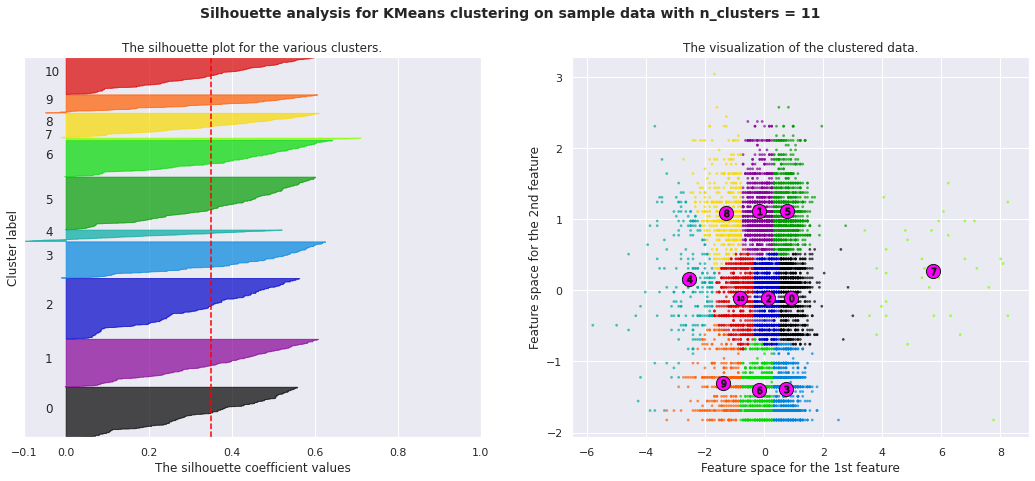

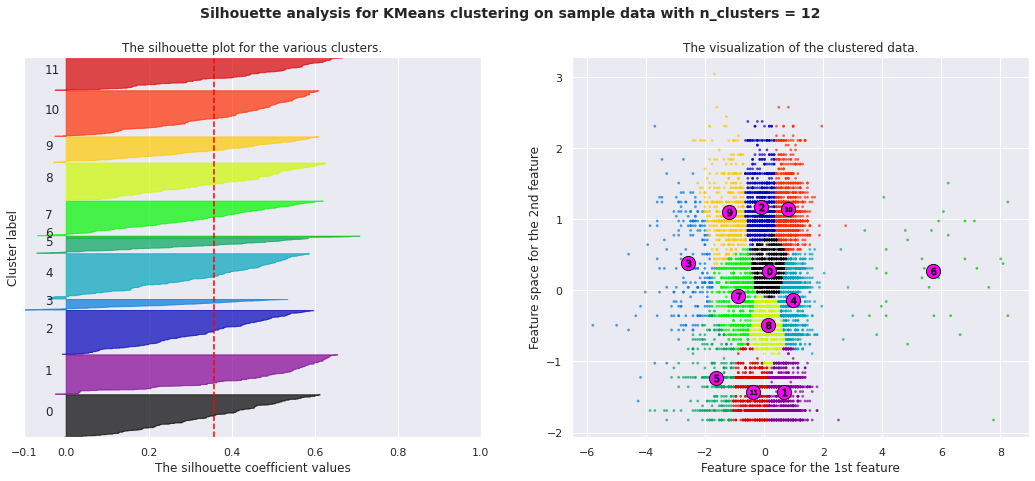

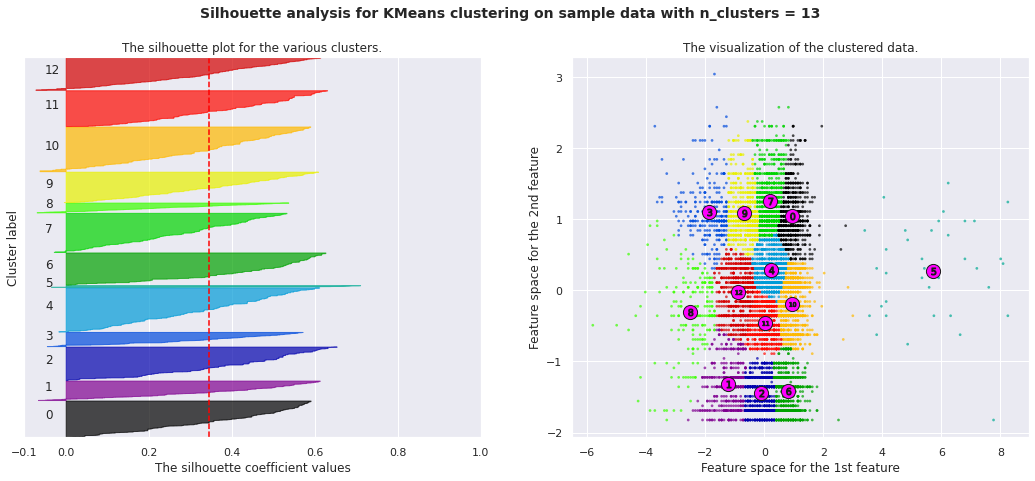

In [ ]:

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13]

for n_clusters in range_n_clusters:
    # Create a subplot 
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot 
    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("n_clusters =", n_clusters,
          "average silhouette_score :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores 
        
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette 
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling 
    centers = clusterer.cluster_centers_
    #  circles at cluster 
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="magenta", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

##Hierarchical Clustering

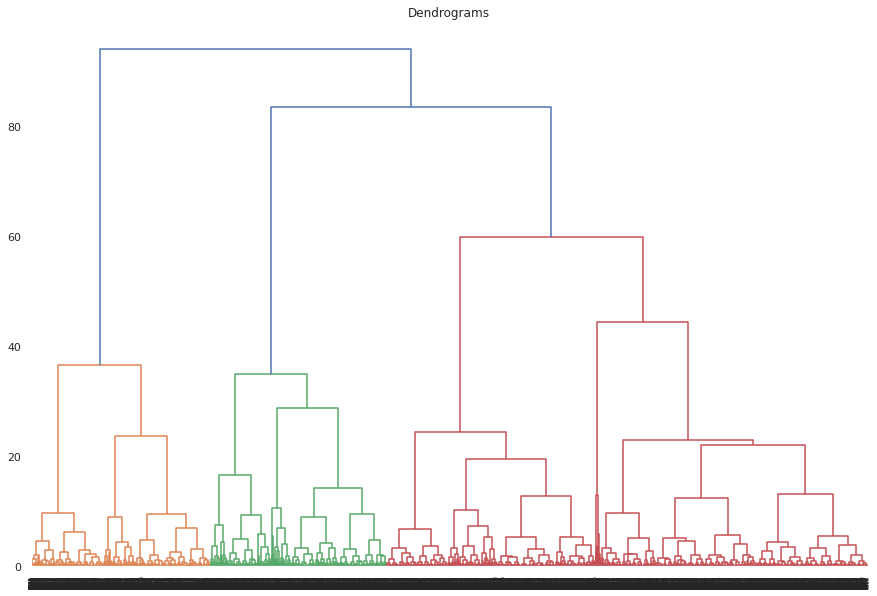

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15,10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

plt.axhline(y=180)


No. of Cluster = 3

##DBSCAN

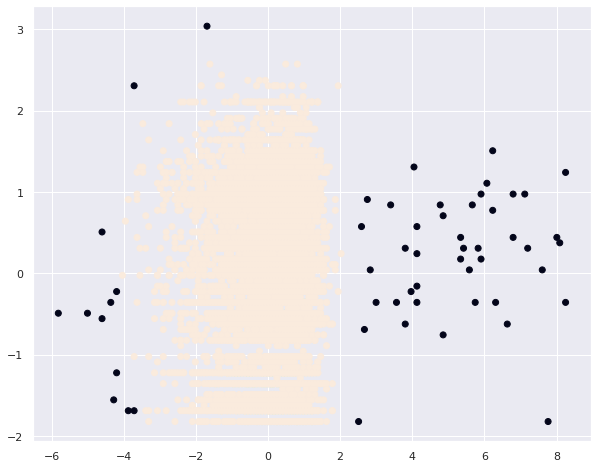

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.6, min_samples=15).fit_predict(X)
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

##K-means Clustering

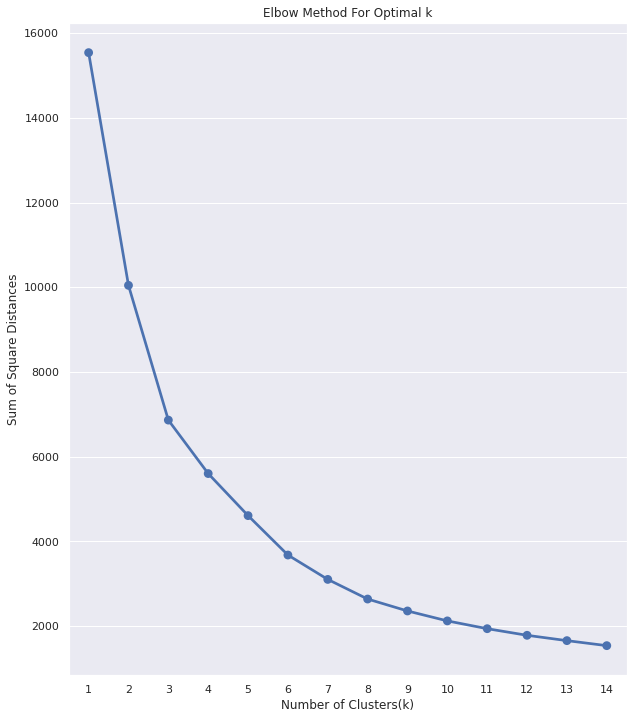

<Figure size 864x864 with 0 Axes>

In [ ]:
# using elbow method to find the most suitable cluster numbers
features_for_clusterring =df[['length','length_listed']]
scaler_method =preprocessing.StandardScaler()
final_feature =scaler_method.fit_transform(features_for_clusterring) 
X=final_feature
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.figure(figsize=(12,12))
plt.show()

## K-means Clustering unsupervised ML algorithm

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

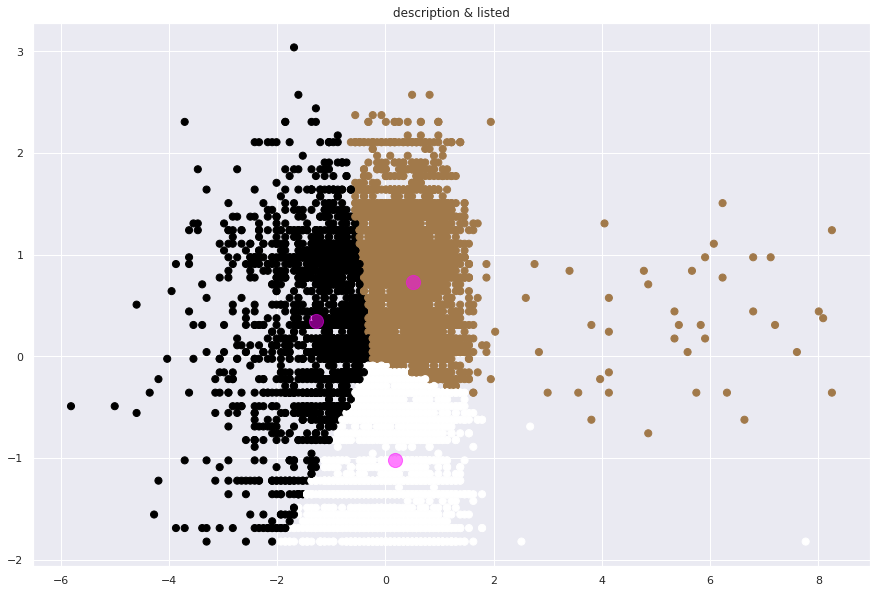

In [ ]:
plt.figure(figsize=(15,10))
plt.title('description & listed')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='cubehelix')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='magenta', s=200, alpha=0.5)


*1-2992*

*2-2538*

*3-2240*

##Conclusion


*   Netflix has 5372 movies and 2398 TV shows,
there are more number movies on Netflix than TV shows.
*   TV-MA has the highest number of ratings for tv shows i,e adult ratings
*   Highest number of movies released in 2017 and 2018.
*   The number of movies on Netflix is growing significantly faster than the number of TV shows.
*   We saw a huge increase in the number of movies and television episodes after 2015.
*   There is a significant drop in the number of movies and television episodes produced after 2020.
*   It appears that Netflix has focused more attention on increasing Movie content that TV Shows. Movies have increased much more dramatically than TV shows.

*   India is the country having maximum numbers of movie on netflix.


*   USA having maximum numbers of TVshows followed by India.


*  Those movies that have a rating of NC-17 have the longest average duration.

*   When it comes to movies having a TV-Y rating, they have the shortest runtime on average
*   October to January, maximum number of movies and TV shows were added.







**KMeans cluster score**

n_clusters = 2 average silhouette_score : 0.3601761941410064

n_clusters = 3 average silhouette_score : 0.3786424530063482

n_clusters = 4 average silhouette_score : 0.3490757756268031

n_clusters = 5 average silhouette_score : 0.3601906332511891

n_clusters = 6 average silhouette_score : 0.36897493498221406



K-means Clustering unsupervised ML algorithm


*   1-2992
*   2-2538
*   3-2240





**Elbow** **Method** For Optimal k as the numbers of clusters increases the Sum of squares distance decreases.

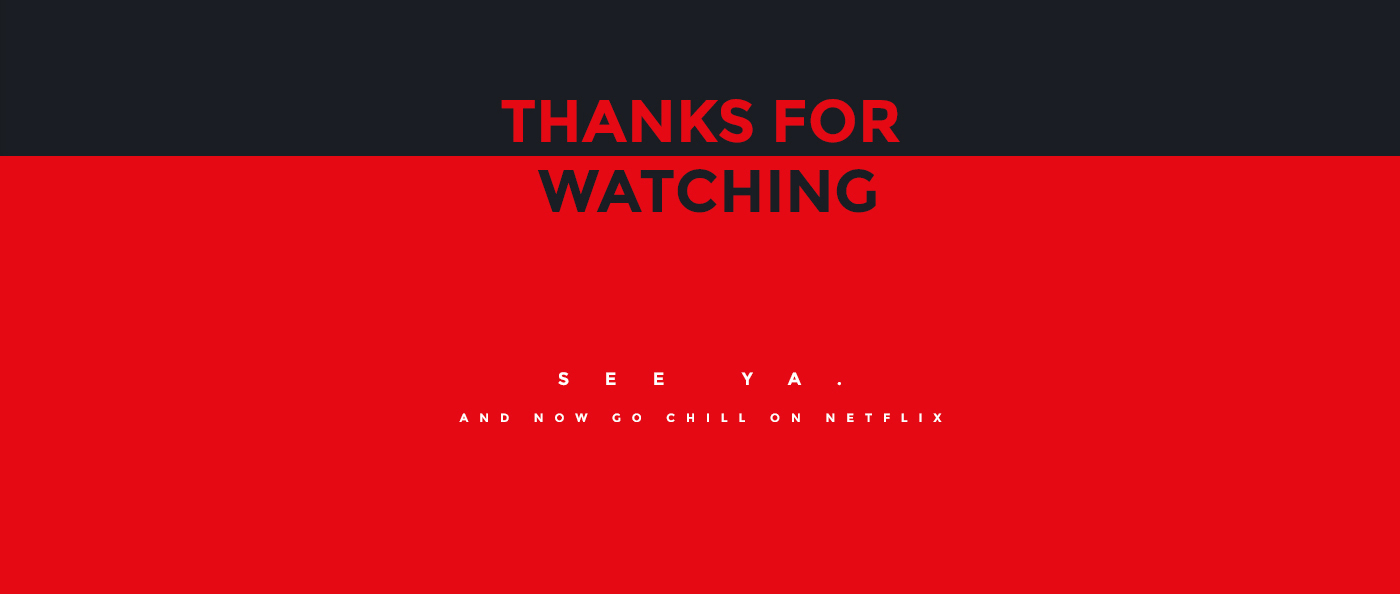